In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [18]:
# Load the dataset
df = pd.read_csv('Titanic-Dataset.csv')

In [19]:
print(df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [20]:
print("\nDataset Info:")
print(df.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [21]:
print("\nNull Values in Each Column:")
print(df.isnull().sum())


Null Values in Each Column:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [22]:
print("\nSummary Statistics:")
print(df.describe())


Summary Statistics:
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [23]:
# Drop Cabin column (too many missing values)
df = df.drop(columns=['Cabin'])

In [24]:
age_median = df['Age'].median()
df['Age'] = df['Age'].fillna(age_median)

In [25]:
embarked_mode = df['Embarked'].mode()[0]
df['Embarked'] = df['Embarked'].fillna(embarked_mode)

In [26]:
print("Null Values After Imputation:")
print(df.isnull().sum())

Null Values After Imputation:
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


In [27]:
df = df.drop(columns=['Name', 'Ticket', 'PassengerId'])

In [28]:
# Label encode Sex
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

In [29]:
# One-hot encode Embarked
df = pd.get_dummies(df, columns=['Embarked'], prefix='Embarked')

In [30]:
print("Dataset After Encoding:")
print(df.head())

Dataset After Encoding:
   Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked_C  Embarked_Q  \
0         0       3    0  22.0      1      0   7.2500       False       False   
1         1       1    1  38.0      1      0  71.2833        True       False   
2         1       3    1  26.0      0      0   7.9250       False       False   
3         1       1    1  35.0      1      0  53.1000       False       False   
4         0       3    0  35.0      0      0   8.0500       False       False   

   Embarked_S  
0        True  
1       False  
2        True  
3        True  
4        True  


In [31]:
# Check data types
print("\nData Types After Encoding:")
print(df.dtypes)


Data Types After Encoding:
Survived        int64
Pclass          int64
Sex             int64
Age           float64
SibSp           int64
Parch           int64
Fare          float64
Embarked_C       bool
Embarked_Q       bool
Embarked_S       bool
dtype: object


In [32]:
# Convert boolean Embarked columns to uint8
embarked_cols = ['Embarked_C', 'Embarked_Q', 'Embarked_S']
df[embarked_cols] = df[embarked_cols].astype('uint8')

# Display first 5 rows to verify
print("Dataset After Converting Embarked to uint8:")
print(df.head())

# Check data types
print("\nData Types After Conversion:")
print(df.dtypes)

Dataset After Converting Embarked to uint8:
   Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked_C  Embarked_Q  \
0         0       3    0  22.0      1      0   7.2500           0           0   
1         1       1    1  38.0      1      0  71.2833           1           0   
2         1       3    1  26.0      0      0   7.9250           0           0   
3         1       1    1  35.0      1      0  53.1000           0           0   
4         0       3    0  35.0      0      0   8.0500           0           0   

   Embarked_S  
0           1  
1           0  
2           1  
3           1  
4           1  

Data Types After Conversion:
Survived        int64
Pclass          int64
Sex             int64
Age           float64
SibSp           int64
Parch           int64
Fare          float64
Embarked_C      uint8
Embarked_Q      uint8
Embarked_S      uint8
dtype: object


In [33]:
from sklearn.preprocessing import StandardScaler

# Identify numerical columns to scale
numerical_cols = ['Age', 'Fare', 'SibSp', 'Parch']

# Initialize scaler
scaler = StandardScaler()

# Apply scaling
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Display summary statistics for scaled columns
print("Summary Statistics After Scaling:")
print(df[numerical_cols].describe())

# Display first 5 rows
print("\nFirst 5 Rows After Scaling:")
print(df.head())

Summary Statistics After Scaling:
                Age          Fare         SibSp         Parch
count  8.910000e+02  8.910000e+02  8.910000e+02  8.910000e+02
mean   2.272780e-16  3.987333e-18  4.386066e-17  5.382900e-17
std    1.000562e+00  1.000562e+00  1.000562e+00  1.000562e+00
min   -2.224156e+00 -6.484217e-01 -4.745452e-01 -4.736736e-01
25%   -5.657365e-01 -4.891482e-01 -4.745452e-01 -4.736736e-01
50%   -1.046374e-01 -3.573909e-01 -4.745452e-01 -4.736736e-01
75%    4.333115e-01 -2.424635e-02  4.327934e-01 -4.736736e-01
max    3.891554e+00  9.667167e+00  6.784163e+00  6.974147e+00

First 5 Rows After Scaling:
   Survived  Pclass  Sex       Age     SibSp     Parch      Fare  Embarked_C  \
0         0       3    0 -0.565736  0.432793 -0.473674 -0.502445           0   
1         1       1    1  0.663861  0.432793 -0.473674  0.786845           1   
2         1       3    1 -0.258337 -0.474545 -0.473674 -0.488854           0   
3         1       1    1  0.433312  0.432793 -0.473674  0.4

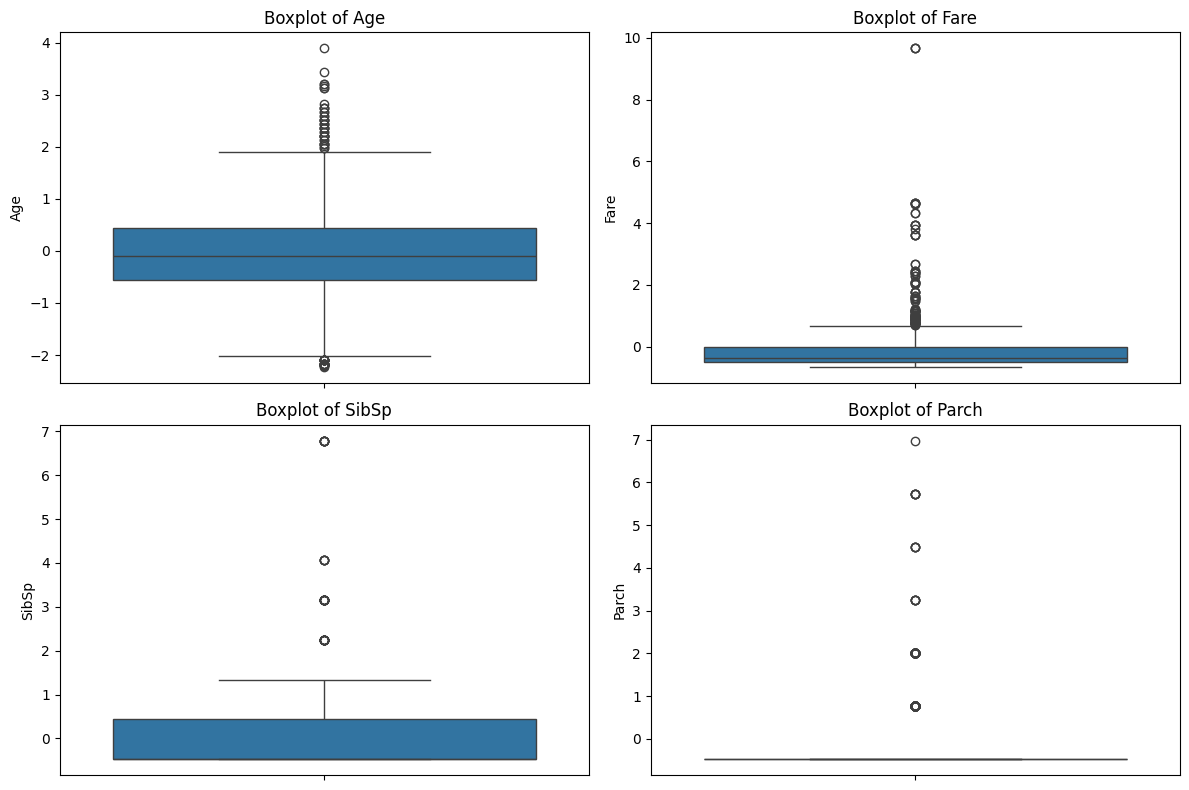

Rows before outlier removal: 891
Rows after outlier removal: 577


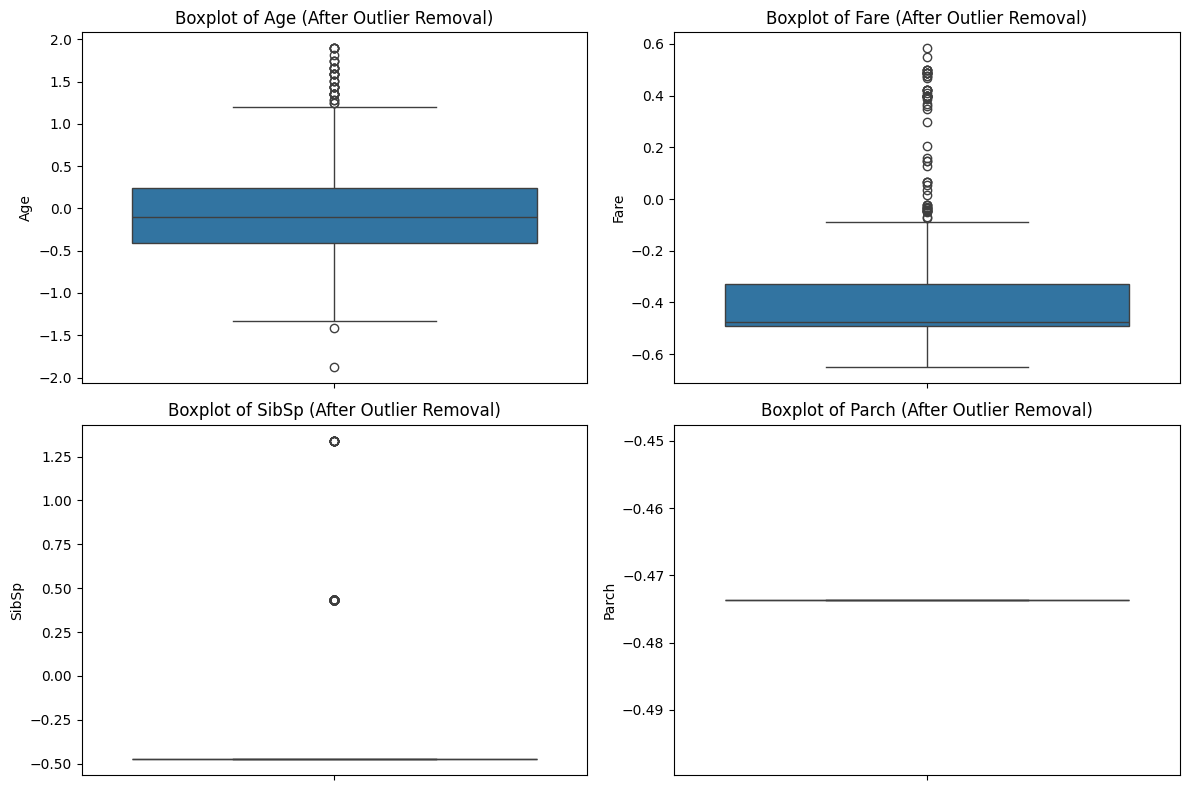

In [34]:
# Visualize outliers before removal
plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

# Function to remove outliers using IQR
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

# Remove outliers for numerical columns
original_shape = df.shape[0]
for col in numerical_cols:
    df = remove_outliers(df, col)

# Display dataset size after outlier removal
print(f"Rows before outlier removal: {original_shape}")
print(f"Rows after outlier removal: {df.shape[0]}")

# Visualize outliers after removal
plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col} (After Outlier Removal)')
plt.tight_layout()
plt.show()